<a href="https://colab.research.google.com/github/uchoagab/Desafio-VLab/blob/model_evaluation/Desafio2_VLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento e Limpeza do dataset

**Importação de todos os componentes necessários para a análise. O dataset "GoodReads 100k books" (https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k) foi baixado localmente e subido para o Colab.**

In [164]:
import pandas as pd
import numpy as np

In [165]:
df = pd.read_csv('sample_data/GoodReads_100k_books.csv')

In [166]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         100000 non-null  int64  
 9   rating        100000 non-null  float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


,pages,rating,reviews,totalratings
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,255.010240,3.833055,181.528450,2.990764e+03
std,367.913582,0.621237,1449.451229,3.635338e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,135.000000,3.660000,3.000000,3.100000e+01
50%,240.000000,3.910000,15.000000,1.460000e+02
75%,336.000000,4.140000,67.000000,7.440000e+02
max,70000.000000,5.000000,158776.000000,3.819326e+06


In [167]:
# Remoção das colunas irrelevantes
df.drop(columns=['isbn', 'isbn13', 'link'], axis=1, inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   pages         100000 non-null  int64  
 6   rating        100000 non-null  float64
 7   reviews       100000 non-null  int64  
 8   title         99999 non-null   object 
 9   totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.6+ MB


In [169]:
df = df.dropna(subset=['rating', 'totalratings'])

In [170]:
# Agregar por [autor, título], remover duplicatas criando nova avaliação
grouped_df = df.groupby(['author', 'title'], as_index=False).agg({
    'bookformat': 'first',
    'desc': 'first',
    'genre': 'first',
    'img': 'first',
    'pages': 'first',
    'reviews': 'sum',
    'totalratings': 'sum',
    'rating': lambda x: (x * df.loc[x.index, 'totalratings']).sum() / df.loc[x.index, 'totalratings'].sum()  # Média ponderada das avaliações duplicadas
})

df = grouped_df

<ipython-input-170-2e2bdd237ccd>:10: RuntimeWarning: invalid value encountered in scalar divide
  'rating': lambda x: (x * df.loc[x.index, 'totalratings']).sum() / df.loc[x.index, 'totalratings'].sum()  # Média ponderada das avaliações duplicadas


In [171]:
# Checar existência de valores NaN por coluna
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

author           0.000000
title            0.000000
bookformat       3.177955
desc             6.728257
genre           10.470738
img              3.042830
pages            0.000000
reviews          0.000000
totalratings     0.000000
rating           1.559450
dtype: float64


**Como a única coluna onde mais de 10% dos valores são NaN é gênero, podemos converter seus elementos vazios para string vazia e depois transformar todos em listas.**

---



In [172]:
print(df['genre'][1])

History,European Literature,German Literature,Reference,Dictionaries


In [173]:
# Trocar NaN por string vazia
df['genre'] = df['genre'].fillna('')

# Converter elementos da coluna de gênero por lista, divindo as string por vírgula
df['genre'] = df['genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] if x else [])

In [174]:
print(df['genre'][1])

['History', 'European Literature', 'German Literature', 'Reference', 'Dictionaries']


**Assim, os dados estão prontos para serem usados.**


---





# Análise Exploratória dos Dados

**Primeiro checa-se novamente como está o dataset**

---



In [175]:
import matplotlib.pyplot as plt

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99907 entries, 0 to 99906
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        99907 non-null  object 
 1   title         99907 non-null  object 
 2   bookformat    96732 non-null  object 
 3   desc          93185 non-null  object 
 4   genre         99907 non-null  object 
 5   img           96867 non-null  object 
 6   pages         99907 non-null  int64  
 7   reviews       99907 non-null  int64  
 8   totalratings  99907 non-null  int64  
 9   rating        98349 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 7.6+ MB


In [177]:
df.describe()

,pages,reviews,totalratings,rating
count,99907.000000,99907.000000,9.990700e+04,98349.000000
mean,255.107710,181.697399,2.993548e+03,3.893631
std,367.990377,1450.115426,3.637019e+04,0.393974
min,0.000000,0.000000,0.000000e+00,1.000000
25%,135.000000,3.000000,3.100000e+01,3.670000
50%,240.000000,15.000000,1.460000e+02,3.920000
75%,336.000000,67.000000,7.460000e+02,4.140000
max,70000.000000,158776.000000,3.819326e+06,5.000000


In [178]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

author          0.000000
title           0.000000
bookformat      3.177955
desc            6.728257
genre           0.000000
img             3.042830
pages           0.000000
reviews         0.000000
totalratings    0.000000
rating          1.559450
dtype: float64


## **Avaliações**

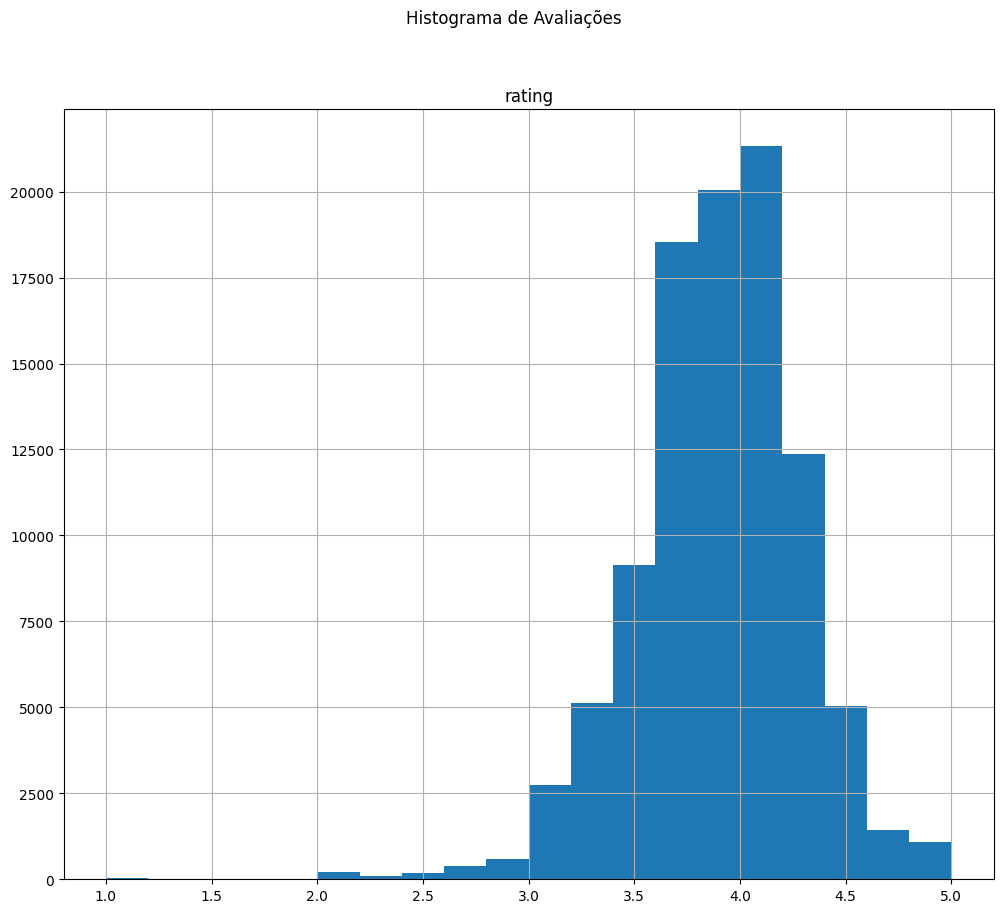

In [179]:
df[['rating']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograma de Avaliações')
plt.show()

## **Gêneros**

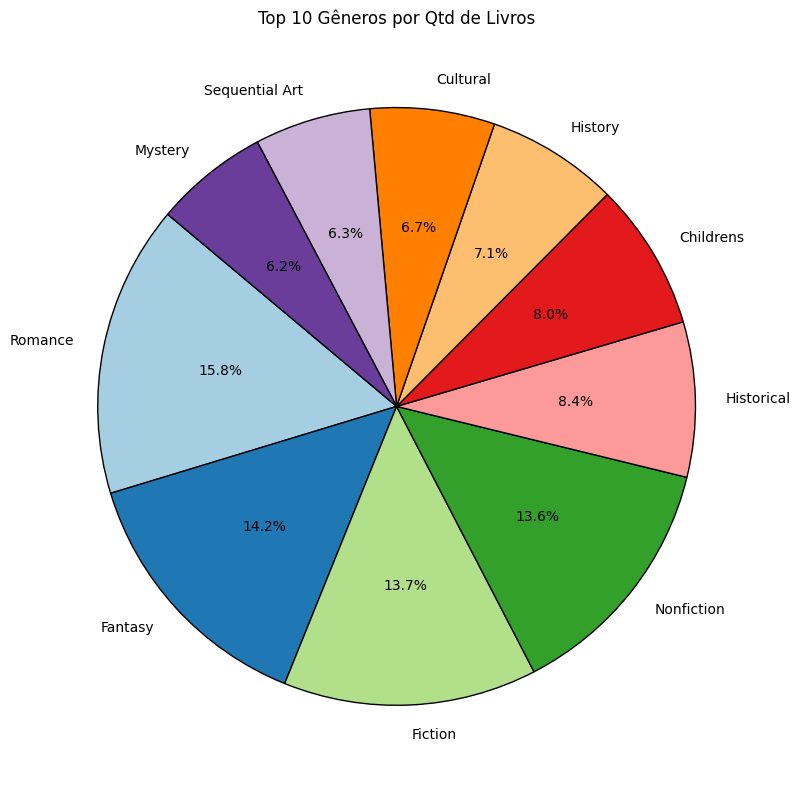

In [180]:
df_exploded_genre = df.explode('genre')

genre_counts = df_exploded_genre['genre'].value_counts()

top_10_genres = genre_counts.head(10)

# Gráfico de Pizza
plt.figure(figsize=(10, 8))
plt.pie(top_10_genres.values, labels=top_10_genres.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 Gêneros por Qtd de Livros')

plt.tight_layout()
plt.show()

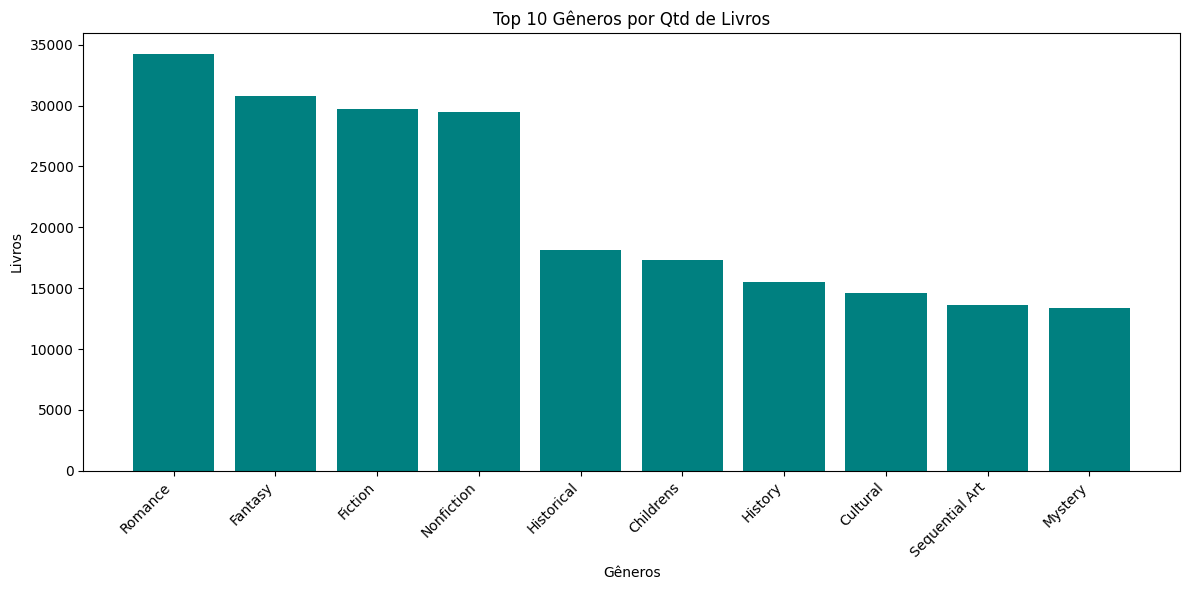

In [181]:
# Gráfico de Barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='teal')

plt.title('Top 10 Gêneros por Qtd de Livros')
plt.xlabel('Gêneros')
plt.ylabel('Livros')
plt.xticks(rotation=45, ha='right')  # Rotacionar nomes

plt.tight_layout()
plt.show()

<ipython-input-182-e1a4599b73ba>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top_20_filtered_genres['book_count'][i], top_20_filtered_genres['avg_rating'][i], genre, fontsize=8, ha='right')


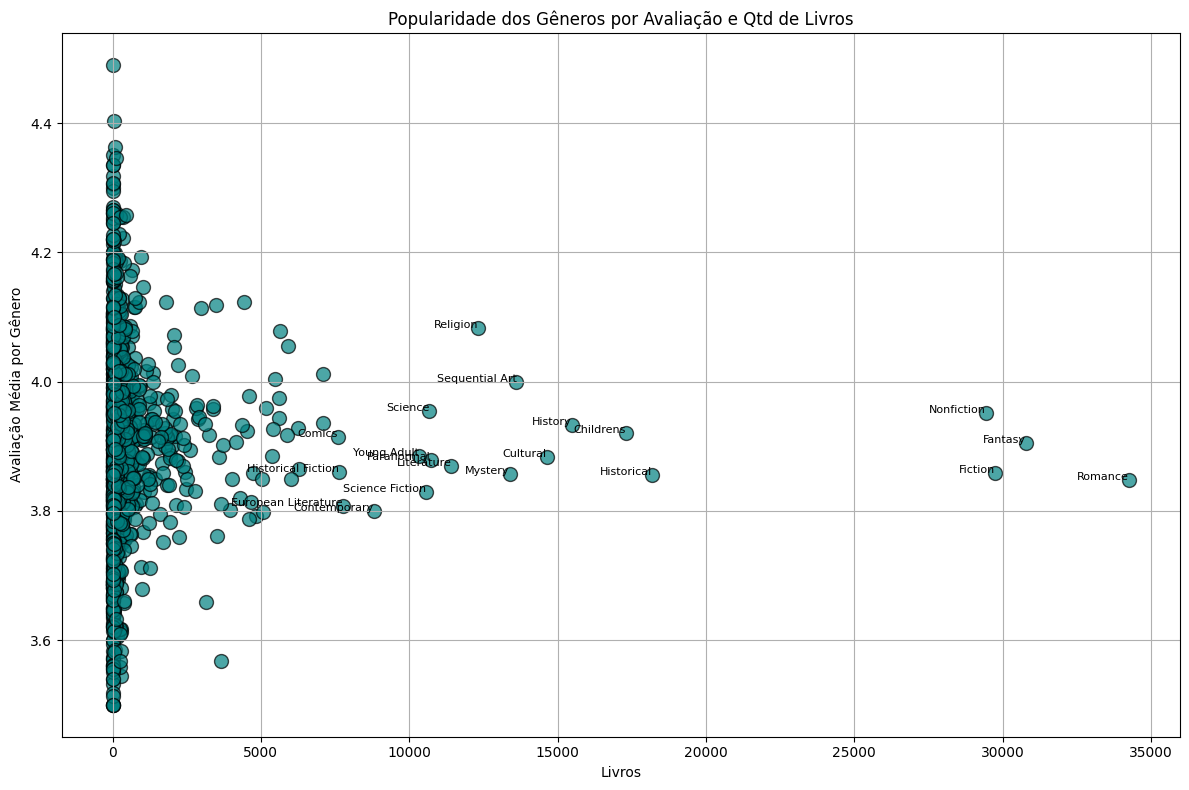

In [182]:
genre_stats = df_exploded_genre.groupby('genre').agg(
    book_count=('genre', 'size'),
    avg_rating=('rating', 'mean')
)

# Piso e Teto das Avaliações representadas no gráfico
rating_range = (3.5, 4.5)
filtered_genres = genre_stats[(genre_stats['avg_rating'] >= rating_range[0]) &
                              (genre_stats['avg_rating'] <= rating_range[1])]

# Top 20 Gêneros
top_20_filtered_genres = filtered_genres.sort_values(by='book_count', ascending=False).head(20)

# Criar Gráfico de Dispersão
plt.figure(figsize=(12, 8))
plt.scatter(filtered_genres['book_count'], filtered_genres['avg_rating'], color='teal', edgecolors='black', alpha=0.7, s=100)

plt.title(f'Popularidade dos Gêneros por Avaliação e Qtd de Livros')
plt.xlabel('Livros')
plt.ylabel('Avaliação Média por Gênero')
plt.grid(True)
plt.tight_layout()

# Adicionar Label para os Top 20 Gêneros
for i, genre in enumerate(top_20_filtered_genres.index):
    plt.text(top_20_filtered_genres['book_count'][i], top_20_filtered_genres['avg_rating'][i], genre, fontsize=8, ha='right')

plt.show()

## **Autores**

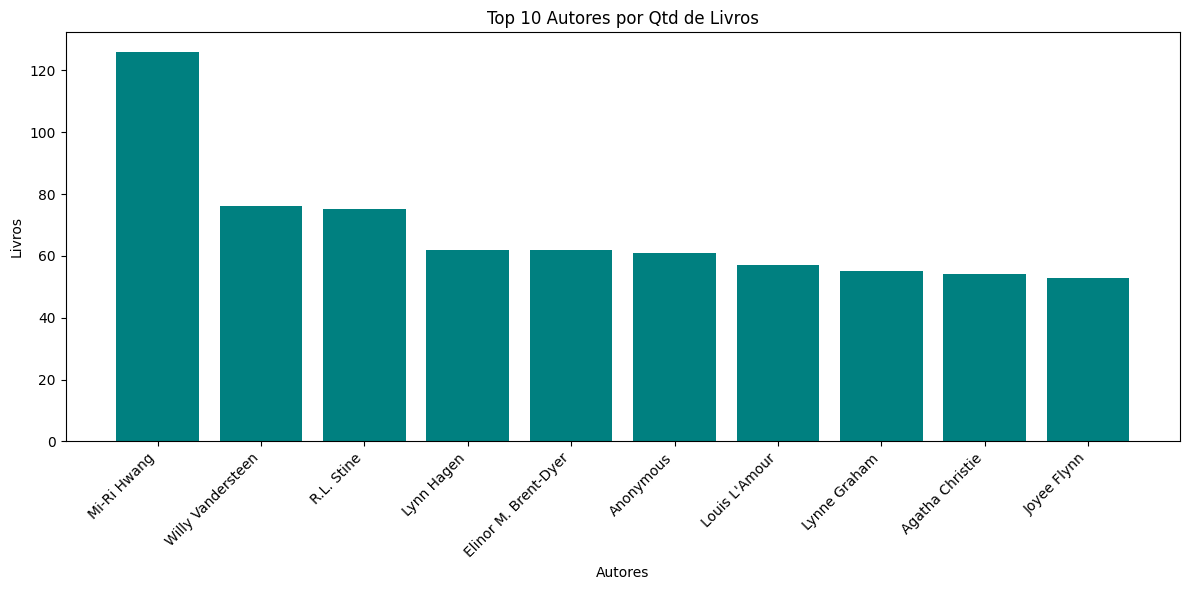

In [183]:
df_exploded_author = df.explode('author')

author_counts = df_exploded_author['author'].value_counts()

top_10_authors = author_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_authors.index, top_10_authors.values, color='teal')

plt.title('Top 10 Autores por Qtd de Livros')
plt.xlabel('Autores')
plt.ylabel('Livros')
plt.xticks(rotation=45, ha='right')  # Rotacionar nomes

plt.tight_layout()
plt.show()

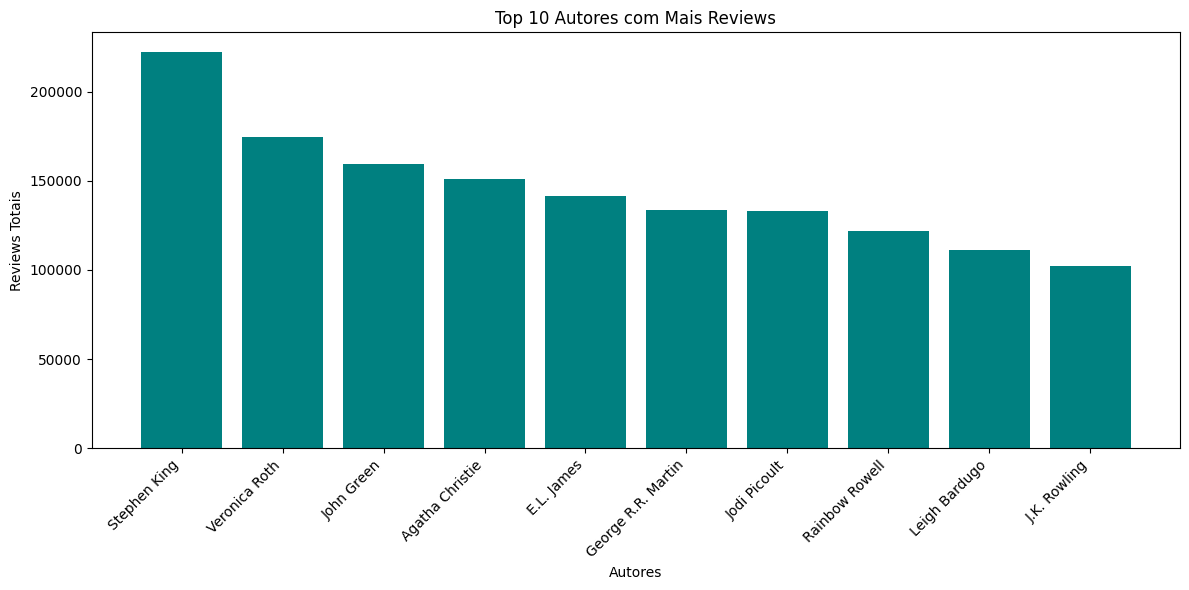

In [184]:
author_reviews = df.groupby('author')['reviews'].sum()

author_reviews_sorted = author_reviews.sort_values(ascending=False)

top_10_authors = author_reviews_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_authors.index, top_10_authors.values, color='teal')

plt.title('Top 10 Autores com Mais Reviews')
plt.xlabel('Autores')
plt.ylabel('Reviews Totais')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-185-c661fddd9bc1>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top_20_filtered_authors['book_count'][i], top_20_filtered_authors['avg_rating'][i], author, fontsize=8, ha='right')


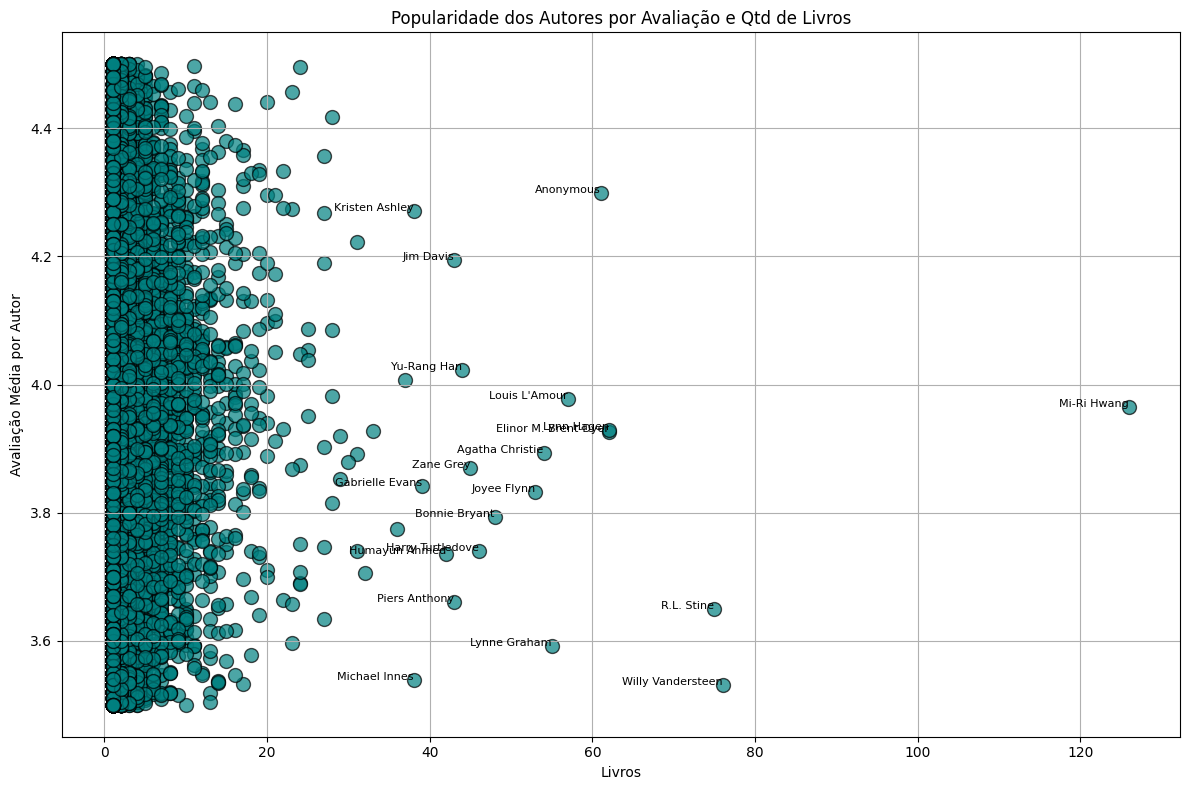

In [185]:
author_stats = df.groupby('author').agg(
    book_count=('author', 'size'),
    avg_rating=('rating', 'mean')
)

rating_range = (3.5, 4.5)
filtered_authors = author_stats[(author_stats['avg_rating'] >= rating_range[0]) &
                                (author_stats['avg_rating'] <= rating_range[1])]

top_50_authors = filtered_authors.sort_values(by='book_count', ascending=False).head(50)

plt.figure(figsize=(12, 8))
plt.scatter(filtered_authors['book_count'], filtered_authors['avg_rating'], color='teal', edgecolors='black', alpha=0.7, s=100)

plt.title(f'Popularidade dos Autores por Avaliação e Qtd de Livros')
plt.xlabel('Livros')
plt.ylabel('Avaliação Média por Autor')
plt.grid(True)
plt.tight_layout()

top_20_filtered_authors = top_50_authors.head(20)
for i, author in enumerate(top_20_filtered_authors.index):
    plt.text(top_20_filtered_authors['book_count'][i], top_20_filtered_authors['avg_rating'][i], author, fontsize=8, ha='right')

plt.show()

# Preparação de Dados para Modelagem

Pode-se iniciar criando novas colunas relevantes para o dataset

---



In [190]:
df['review_to_rating'] = df['reviews'] / df['rating']
df['popularity'] = df['reviews'] * df['rating']

Pode-se preencher o resto das colunas categóricas

---



In [191]:
df['pages'].fillna(df['pages'].median(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)
df['reviews'].fillna(df['reviews'].median(), inplace=True)

<ipython-input-191-572021e55eb5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pages'].fillna(df['pages'].median(), inplace=True)
<ipython-input-191-572021e55eb5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

**Faz-se *target encoding* para os gêneros, autores e bookformat**

In [192]:
df['author_encoded'] = df.groupby('author')['rating'].transform('mean') # Target Encoding
df['bookformat_encoded'] = df.groupby('bookformat')['rating'].transform('mean') # Target Encoding

In [220]:
df_exploded = df.explode('genre')

# Target Encoding
genre_target_encoding = df_exploded.groupby('genre')['rating'].mean()

# Mapear Target Encoding
df_exploded['genre_encoded_target'] = df_exploded['genre'].map(genre_target_encoding)

# Concatenar gêneros novamente
df_final = df_exploded.groupby('author').agg({
    'genre_encoded_target': 'mean',
    'rating': 'mean',
    'reviews': 'sum',
    'totalratings': 'sum',
    'pages': 'mean',
    'popularity': 'mean',
    'bookformat_encoded': 'first',
    'author_encoded': 'first',
    'review_to_rating': 'mean'
}).reset_index()

# Final dataset check
print(df_final.head())

                                        author  genre_encoded_target  rating  \
0                                      "Niblo"                   NaN    4.00   
1                      &. Ruprecht Vandenhoeck              3.958833    5.00   
2                       'Captain' Robert Brown              3.844428    3.60   
3  'Cato',Michael Foot,Peter Howard,Frank Owen              3.941560    3.84   
4                             'Nathan Burgoine              3.859305    4.17   

   reviews  totalratings  pages  popularity  bookformat_encoded  \
0        0             3    0.0        0.00            3.903622   
1        0             5  829.0        0.00            3.914431   
2      455          2119  265.0      126.00            3.903622   
3       10           100  160.0       19.20            3.903622   
4     1568          4886  264.0      467.04            3.903622   

   author_encoded  review_to_rating  
0            4.00          0.000000  
1            5.00          0.000000  
2 

**Normalização de valores numéricos**

In [195]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Assuming you want to scale all the numerical columns
numerical_columns = ['pages', 'reviews', 'totalratings', 'rating', 'review_to_rating', 'popularity']

# Fit and transform the data to scale the features
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

# Check the result
print(df_final[numerical_columns].head())

      pages   reviews  totalratings    rating  review_to_rating  popularity
0 -0.650316 -0.102662     -0.073265  0.289841         -0.132930   -0.124708
1  1.416755 -0.102662     -0.073263  2.799638         -0.132930   -0.124708
2  0.010448 -0.089292     -0.070581 -0.714078         -0.096476   -0.095984
3 -0.251364 -0.102368     -0.073142 -0.111726         -0.128048   -0.120331
4  0.007955 -0.056589     -0.067070  0.716507         -0.032221   -0.018236


In [196]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68766 entries, 0 to 68765
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                68766 non-null  object 
 1   genre_encoded_target  60366 non-null  float64
 2   rating                68766 non-null  float64
 3   reviews               68766 non-null  float64
 4   totalratings          68766 non-null  float64
 5   pages                 68766 non-null  float64
 6   popularity            68766 non-null  float64
 7   bookformat_encoded    66987 non-null  float64
 8   author_encoded        68766 non-null  float64
 9   review_to_rating      68766 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


In [197]:
df_final.drop(columns='author', inplace=True)

In [198]:
from scipy import stats

# IQR para identificar outliers
Q1 = df_final[['pages', 'reviews', 'popularity', 'totalratings']].quantile(0.25)
Q3 = df_final[['pages', 'reviews', 'popularity', 'totalratings']].quantile(0.75)
IQR = Q3 - Q1

# Remover outliers baseado no IQR
df_no_outliers = df_final[~((df_final[['pages', 'reviews', 'popularity', 'totalratings']] < (Q1 - 1.5 * IQR)) |
                            (df_final[['pages', 'reviews', 'popularity', 'totalratings']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Treinamento de Um Modelo Preditivo

**Antes de seguir para o treino, é necessário preparar o target e dividir os dados de treino e teste**

---



In [237]:
# Criar categorias de classificação
bins = [-8, -3, 0, 3]  # Intrvalos: Baixa (<3), Média (3-4), Alta (>4)
labels = ['Low', 'Medium', 'High']
df_no_outliers['rating_category'] = pd.cut(df_no_outliers['rating'], bins=bins, labels=labels, right=False)

In [238]:
from sklearn.model_selection import train_test_split

# Preparar e dividir dados
y = df_no_outliers['rating_category']  # Target de classificação
X = df_no_outliers.drop(columns=['rating', 'rating_category'])

In [239]:
print(X.isna().sum())

genre_encoded_target    8094
reviews                    0
totalratings               0
pages                      0
popularity                 0
bookformat_encoded      1691
author_encoded             0
review_to_rating           0
dtype: int64


**Como ainda temos valores NaN, será necessário usar um Imputer**

---



In [240]:
print(X.dtypes)

genre_encoded_target    float64
reviews                 float64
totalratings            float64
pages                   float64
popularity              float64
bookformat_encoded      float64
author_encoded          float64
review_to_rating        float64
dtype: object


In [241]:
from sklearn.impute import SimpleImputer

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Criar inputer
imputer = SimpleImputer(strategy='mean') # Estratégia 'mean' para o inputer

# Aplicar imputação
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

print(X.isnull().sum())

genre_encoded_target    0
reviews                 0
totalratings            0
pages                   0
popularity              0
bookformat_encoded      0
author_encoded          0
review_to_rating        0
dtype: int64


In [243]:
from sklearn.model_selection import train_test_split

# Divisão do dados estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in the train and test sets
print("Train Set Distribution:\n", y_train.value_counts())
print("Test Set Distribution:\n", y_test.value_counts())

Train Set Distribution:
 rating_category
High      22344
Medium    20254
Low         438
Name: count, dtype: int64
Test Set Distribution:
 rating_category
High      5586
Medium    5064
Low        109
Name: count, dtype: int64


**Agora podemos treinar o modelo**

---



In [245]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Avaliação do Modelo

In [258]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [255]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de boa avaliação (classe 1)

In [260]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.99      0.99      5586
         Low       0.99      0.84      0.91       109
      Medium       0.99      0.98      0.99      5064

    accuracy                           0.99     10759
   macro avg       0.99      0.94      0.96     10759
weighted avg       0.99      0.99      0.99     10759

Accuracy: 0.9868946928153174


In [267]:
# Avaliações em 4 dígitos
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'accuracy: {accuracy_score(y_test, y_pred):.4f}')

Recall: 0.9869
F1-Score: 0.9868
accuracy: 0.9869
